# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Luiz Carlos Bessa de Lima

**Matricula**: 201821256

**Turma**: 10A

Link do repositório GitHub: https://github.com/lcbessa/EFC-1-CPA

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [2]:
def insertionSort(arranjo):
  global qtdComparacoes
  for j in range (1, len(arranjo)):
    qtdComparacoes += 1
    chave = arranjo[j]
    i = j - 1
    while i >= 0 and arranjo[i] > chave:
      qtdComparacoes += 1
      arranjo[i + 1] = arranjo[i]
      i = i - 1
      arranjo[i + 1] = chave
    qtdComparacoes += 1 #última comparação do while
  qtdComparacoes += 1 #última comparação do for
  return arranjo

##  Merge Sort


In [3]:
def mergeSort(arranjo, esquerdo = 0, direito = None, auxiliar = None):
  global qtdComparacoes
  if auxiliar == None: auxiliar = [0] * len(arranjo)
  if direito == None: direito = len(arranjo) - 1
  if direito <= esquerdo:
    qtdComparacoes += 1
    return
  meio = (esquerdo + direito) // 2
  mergeSort(arranjo, esquerdo, meio, auxiliar)
  mergeSort(arranjo, meio + 1, direito, auxiliar)
  merge(arranjo, auxiliar, esquerdo, meio, direito)

def merge(arranjo, auxiliar, esquerdo, meio, direito):
  global qtdComparacoes
  for i in range(esquerdo, direito + 1):
    qtdComparacoes += 1
    auxiliar[i] = arranjo[i]
  e = esquerdo
  d = meio + 1
  for i in range(esquerdo, direito + 1):
    qtdComparacoes += 1
    if (e > meio):
      qtdComparacoes += 1
      arranjo[i] = auxiliar[d]
      d += 1
    elif d > direito:
      qtdComparacoes += 1
      arranjo[i] = auxiliar[e]
      e += 1
    elif auxiliar[d] < auxiliar[e]:
      qtdComparacoes += 1
      arranjo[i] = auxiliar[d]
      d += 1
    else:
      arranjo[i] = auxiliar[e]
      e += 1

##  Selection Sort


In [4]:
def selectionSort(arranjo):
  global qtdComparacoes
  for i in range(len(arranjo)):
    qtdComparacoes += 1
    menor = i
    for j in range(i + 1, len(arranjo)):
      qtdComparacoes += 1
      if arranjo[j] < arranjo[menor]:
        qtdComparacoes += 1
        menor = j
    if arranjo[i] != arranjo[menor]:
      qtdComparacoes += 1
      auxiliar = arranjo[i]
      arranjo[i] = arranjo[menor]
      arranjo[menor] = auxiliar 
  qtdComparacoes += 1 #última comparação do for

  return arranjo

##  Bubble Sort


In [5]:
def bubbleSort(arranjo):
  global qtdComparacoes
  for i in range(len(arranjo) - 1):
    qtdComparacoes += 1
    for j in range(len(arranjo) - 2):
      if(arranjo[j] > arranjo[j + 1]):
        qtdComparacoes += 1
        arranjo[j], arranjo[j + 1] = arranjo[j + 1], arranjo[j]
  return arranjo


## Heap Sort

In [6]:
def maxHeap(arranjo, tamanho, posicao):
  global qtdComparacoes

  fEsq = 2 * posicao + 1
  fDir = 2 * posicao + 2
  maior = posicao
  if fEsq < tamanho and arranjo[fEsq] > arranjo[posicao]:
    maior = fEsq
    qtdComparacoes += 1
  else:
    maior = posicao
    qtdComparacoes += 1
  if fDir < tamanho and arranjo[fDir] > arranjo[maior]:
    maior = fDir
    qtdComparacoes += 1
  if maior != posicao:
    qtdComparacoes += 1
    arranjo[posicao], arranjo[maior] = arranjo[maior], arranjo[posicao]
    maxHeap(arranjo, tamanho, maior)

def heapSort(arranjo):
  global qtdComparacoes

  tamanho = len(arranjo)

  for i in range(tamanho // 2 -1, -1, -1):
    qtdComparacoes += 1
    maxHeap(arranjo, tamanho, i)
  qtdComparacoes += 1 #última comparação do for

  for i in range(tamanho - 1, 0, -1):
    arranjo[0], arranjo[i] = arranjo[i], arranjo[0]
    maxHeap(arranjo, i, 0)
    qtdComparacoes += 1
  qtdComparacoes += 1 #última comparação do for

## Quick Sort

> pivo = *A[A-comprimento]*

In [7]:
def partition(arranjo, esquerdo, direito):
  global qtdComparacoes
  pivo = arranjo[esquerdo]
  e = esquerdo
  d = esquerdo + 1
  while d <= direito:
    qtdComparacoes += 1
    if arranjo[d] <= pivo:
      qtdComparacoes += 1
      e += 1
      arranjo[e], arranjo[d] = arranjo[d], arranjo[e]
    d += 1
    
  arranjo[e], arranjo[esquerdo] = arranjo[esquerdo], arranjo[e]

  qtdComparacoes += 1
  return e

def quickSort(arranjo, esquerdo = 0, direito = None):
  global qtdComparacoes
  if direito == None: direito = len(arranjo) - 1
  if esquerdo < direito:
    qtdComparacoes += 1
    q = partition(arranjo, esquerdo, direito)
    quickSort(arranjo, esquerdo, q - 1)
    quickSort(arranjo, q + 1, direito)

## Outras Funções

In [8]:
def tempoExecucao(funcao, arranjo):
  inicio = time.time_ns()
  funcao(arranjo)
  return (time.time_ns() - inicio) / 1000

arranjos = list(range(5, 1000, 5))

def criaArranjos(funcao):
  arrays = []
  for arranjo in arranjos:
    a = []
    for i in range(arranjo):
      a.append(funcao(i, arranjo))
    arrays.append(a)
  return arrays

In [9]:
def arranjoCrescente():
  return criaArranjos(lambda i, size: i)

def arranjoDecrescente():
  return criaArranjos(lambda i, size: size - i)

def arranjoAleatorio():
  return criaArranjos(lambda i, size: random.randint(0, size))

In [10]:
funcoesOrdenacao = {
  'InsertionSort': {'funcao': insertionSort},
  'SelectionSort': {'funcao': selectionSort},
  'BubbleSort': {'funcao': bubbleSort},
  'HeapSort': {'funcao': heapSort},
  'MergeSort': {'funcao': mergeSort},
  'QuickSort': {'funcao': quickSort},
}

novoArranjo = {'Arranjo Crescente': arranjoCrescente, 'Arranjo Decrescente': arranjoDecrescente, 'Arranjo Aleatório': arranjoAleatorio}

tipos = novoArranjo.keys()

In [11]:
for funcoes in funcoesOrdenacao.values():
  for tipo in tipos:
    arrays = novoArranjo[tipo]()
    tempos = []
    comparacoes = []
    for array in arrays:
      qtdComparacoes = 0
      tempos.append(tempoExecucao(funcoes['funcao'], array))
      comparacoes.append(qtdComparacoes)
    funcoes[tipo] = tempos
    funcoes[tipo+'qtdComparacoes'] = comparacoes

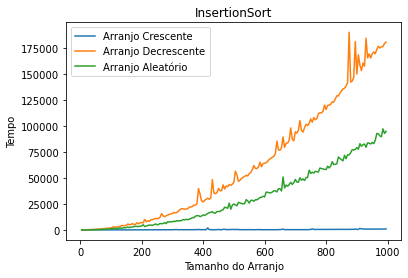

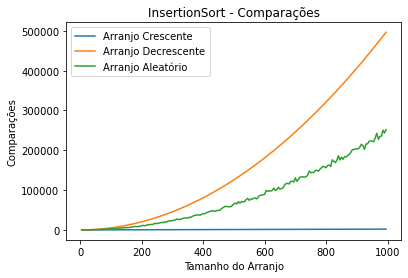

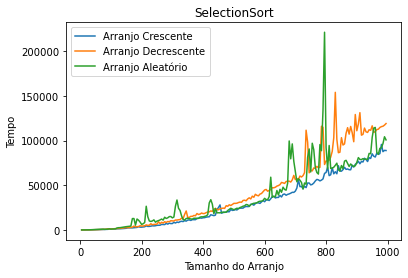

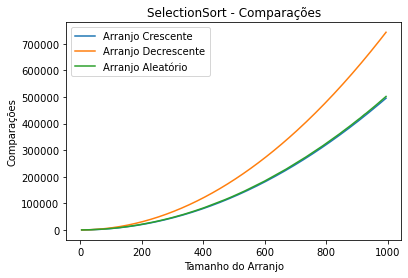

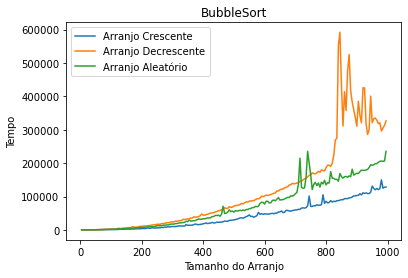

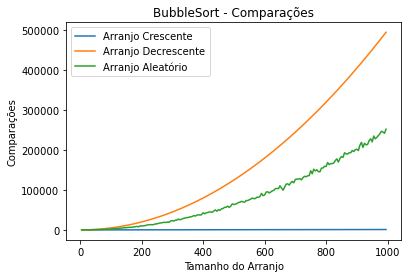

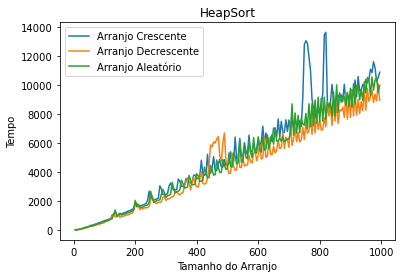

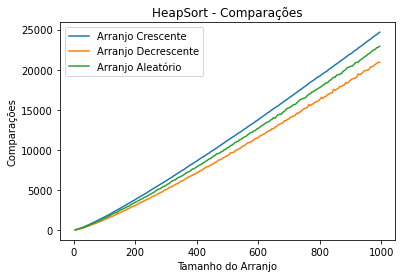

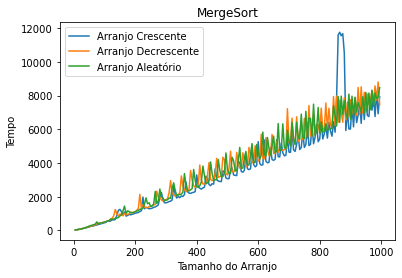

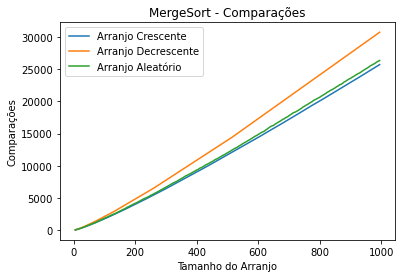

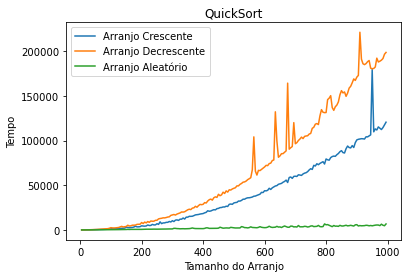

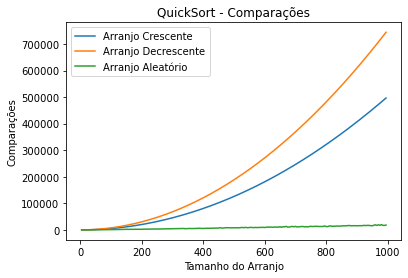

In [12]:
for nome, funcoes in funcoesOrdenacao.items():
  plt.title(nome)
  plt.xlabel('Tamanho do Arranjo')
  plt.ylabel('Tempo')
  for tipo in tipos:
    plt.plot(arranjos, funcoes[tipo], label=tipo)
  plt.legend()
  plt.show()
  print('\n')

  plt.title(nome + ' - Comparações')
  plt.xlabel('Tamanho do Arranjo')
  plt.ylabel('Comparações')
  for tipo in tipos:
    plt.plot(arranjos, funcoes[tipo+'qtdComparacoes'], label=tipo)
  plt.legend()
  plt.show()
  print('\n\n')
  

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

**Análise de Casos:**

InsertionSort:
* Melhor Caso: Arranjo já Ordenado
* Pior Caso: Arranjo Ordenado Decrescente

SelectionSort:
* Todos os casos são iguais

BubbleSort:
* Melhor Caso: Arranjo já Ordenado
* Pior Caso: Arranjo Ordenado Decrescente

HeapSort:
* Todos os casos são iguais

QuickSort:
* Melhor Caso: Quando produz duas listas menores que a metade
* Pior Caso: Quando as chamadas recursivas produzem partições com 0 e n-1 elementos

MergeSort:
* Todos os casos são iguais


> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

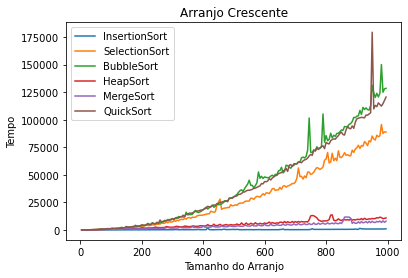

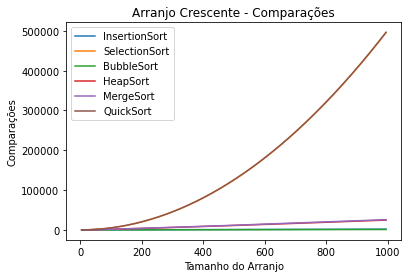

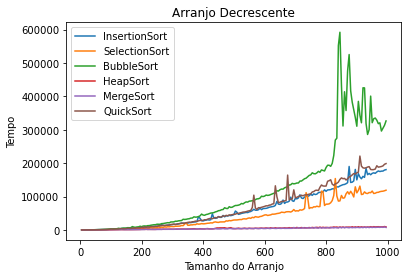

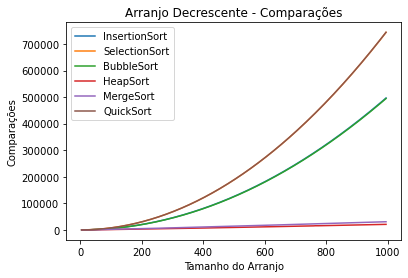

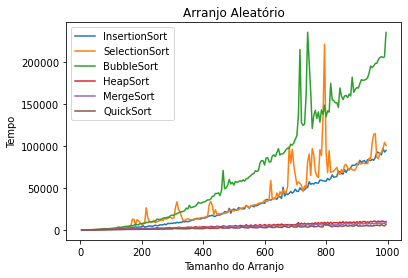

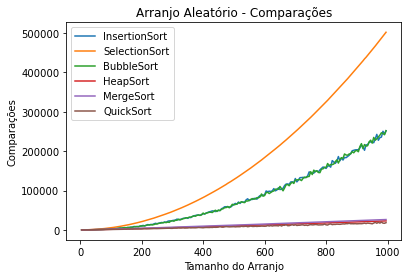

In [13]:
for tipo in tipos:
  plt.title(tipo)
  plt.xlabel('Tamanho do Arranjo')
  plt.ylabel('Tempo') 
  for nome, funcoes in funcoesOrdenacao.items():
    plt.plot(arranjos, funcoes[tipo], label=nome)
  plt.legend()
  plt.show()
  print('\n')

  plt.title(tipo + ' - Comparações')
  plt.xlabel('Tamanho do Arranjo')
  plt.ylabel('Comparações')
  for nome, funcoes in funcoesOrdenacao.items():
    plt.plot(arranjos, funcoes[tipo+'qtdComparacoes'], label=nome)
  plt.legend()
  plt.show()
  print('\n\n')

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)

**Comportamento Assintótico:**

InsertionSort:
* Melhor Caso: Ω(n)
* Pior Caso: O(n²)
* Caso Aleatório: Θ(n²)


SelectionSort:
* Qualquer Caso: O(n²)

BubbleSort:
* Melhor Caso: Ω(n)
* Pior Caso: O(n²)
* Caso Aleatório: Θ(n²)

HeapSort:
* Qualquer Caso: Θ(n log n)

QuickSort:
* Melhor Caso: O(n log n)
* Pior Caso: O(n²)
* Caso Aleatório: O(n log n)

MergeSort:
* Melhor Caso: Θ(n log n)
* Pior Caso: Θ(n log n)
* Caso Aleatório: Θ(n log n)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.

2.   Desenvolva uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.

## Quick Sort Aleatório

In [14]:
def partitionRandom(arranjo, esquerdo, direito):
  pivoIndice = random.randrange(esquerdo, direito)
  arranjo[pivoIndice] = arranjo[direito]
  arranjo[direito] = arranjo[pivoIndice]

  pivo = arranjo[direito]
  ponteiro = esquerdo

  for i in range(esquerdo, direito):
    if arranjo[i] <= pivo:
      arranjo[i], arranjo[ponteiro] = arranjo[ponteiro], arranjo[i]
      ponteiro += 1
  arranjo[ponteiro], arranjo[direito] = arranjo[direito], arranjo[ponteiro]
  return ponteiro


def quickSortRandom(arranjo, esquerdo = 0, direito = None):
  if direito == None: direito = len(arranjo) - 1
  if len(arranjo) == 1:
    return arranjo
  if esquerdo < direito:
    q = partitionRandom(arranjo, esquerdo, direito)
    quickSortRandom(arranjo, esquerdo, q - 1)
    quickSortRandom(arranjo, q + 1, direito)
  return arranjo


In [15]:
quickSortRandomValues = {}
for tipo in tipos:
    arrays = novoArranjo[tipo]()
    tempos = []
    for array in arrays:
      tempos.append(tempoExecucao(quickSortRandom, array))
    quickSortRandomValues[tipo] = tempos

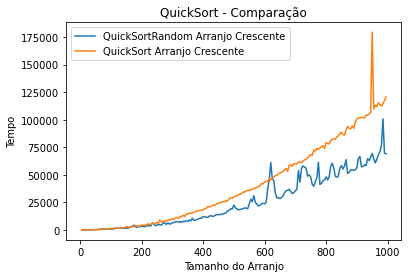

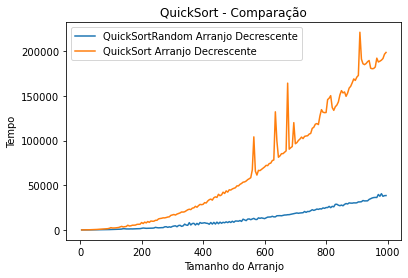

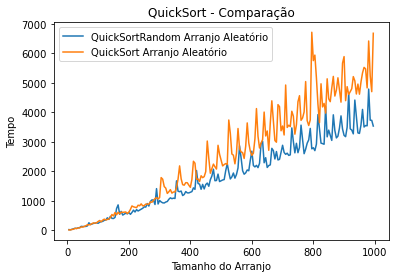

In [16]:
for tipo in tipos:
  plt.title('QuickSort - Comparação')
  plt.xlabel('Tamanho do Arranjo')
  plt.ylabel('Tempo')
  plt.plot(arranjos, quickSortRandomValues[tipo], label='QuickSortRandom ' + tipo)
  plt.plot(arranjos, funcoesOrdenacao['QuickSort'][tipo], label='QuickSort ' + tipo)
  plt.legend()
  plt.show()

In [17]:
print("Boa sorte!!!")

Boa sorte!!!
